## HW2 - Basics of ML

### S1:
- Load digits data
- Visualize few images to check the data and labels
- Normalize (scale) the data
- Q: What is the number of features in this dataset:  __8 x 8 = 64__
- Q: What is the number of samples in this dataset:  __1796__

### S2:
- Apply PCA with 30 components
- Calculate eigenvectors (PCA components) and eigenvalues for the data
- Plot variance explained by principal components
- Q: What is the variance explained by the first PCA component? __0.12__
- Q: What is the total variance explained by the first 5 PCA components? __0.41__

### S3:
- Plot reconstruction error for image no. 377 using 1 to 30 PCA components
- Visualize reconstructions of image no. 52 using [1,3,5,7,9,11,13,15] PCA components
- Q: What is the reconstruction error for image no. 105 using 5 PCA components? __25.368490681572638__
- Q: What is the image with the smallest reconstruction error using 5 PCA components? __image no. 1696__
- Q: What is the image with the largest reconstruction error using 5 PCA components? __image no. 163__
- Q: What is the digit with the smallest average reconstruction error using 5 PCA components? __9__
- Q: What is the digit with the largest average reconstruction error using 5 PCA components? __4__ 

### S4:
- Plot reconstruction errors for all digit 3 images using 5 PCA components
- Visualize reconstruction of first digit 3 image [1,3,5,7,9,11,13,15] PCA components
- Q: What is the average reconstruction error for all digits 3 images using 5 PCA components? __30.324165__

### S5:
- Create a new dataset with only digit 3 images
- Apply PCA
- Calculate eigenvectors (PCA components) and eigenvalues for the data
- Plot variance explained by principal components
- Plot reconstruction errors for all digit 3 images using 5 PCA components
- Visualize reconstruction of first digit 3 image [1,3,5,7,9,11,13,15] PCA components
- Q: What is the average reconstruction error for all digits 3 images using 5 PCA components? __28.505717167199553__
- Q: Comment on the differences for reconstruction errors for digit 3 images using the two PCA models (complete set vs only digit 3 images)? 

#### Comment
The images are clearer, errors are lower, and the variance curve is steeper when we perform PCA on the set of digit three compared to a set with all digits; this suggests that it is fitting well—perhaps too well, overfitting—when the we model on a subset. There is a hitch in the variance explained but that is likely just a quirk of the data: most threes have certain properties in common, and then some different. Regardless, The bias-variance tradeoff is probably at play here, with the latter model tailored to describe threes and the former generally more able to show digits. 

### S6:
- Randomly split the complete dataset into 2 (60% training 40% testing)
- Train an SVM classifier (rbf kernel, default parameters) using the training data
- Calculate testing prediction accuracy of the trained model
- Repeat the previous steps after applying PCA on the initial dataset and reducing the data dimensionality. Calculate prediction accuracy for 2, 5, 10 and 20 components
- Q: Which model obtains the highest classification accuracy? __20 Componets (or modelling without PCA)__

#### Comment

The 20 component model—perhaps surprsing no one as more components will explain more of the variance—yeilds the best results, with accuracy at 0.9304589707927677%. This is not, however, better than modelling with without performing PCA, which achieves a 0.9680111265646731% accuracy. Because these images are only 8 by 8, or 64 dimensions, it may not be worth it to use PCA to use dimensionality. There are indications, though, that accuracy falls at a decreasing rate as dimensionality increases, which suggests that when you use PCA with high dimensional data you gain more (in reduced dimensionality) that you lose (in accuracy).

In [0]:
from sklearn import datasets
from sklearn import svm
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

After loading the necessary packages, we pull in the data and use the `shape` function to inspect the data. 

In [0]:
digits = datasets.load_digits()
digits.target.shape
digits.data.shape

(1797, 64)

6

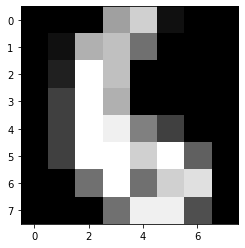

In [0]:
imgTmp = digits.images[58,:,:].squeeze()
plt.imshow(imgTmp, cmap='gray')
digits.target[58]

Here, because I am a little uncertain about what the squeeze function does, I just wanted to see if it changes the data—and it appears not to. 

In [0]:
digits.images[58,:,:].squeeze() == digits.images[58,:,:]

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

# PCA

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

I also save the number of components as an object so that it remains constant; the assignment calls for 30. 

In [0]:
NUM_COMP = 30

For the following analysis, we need just the data, rather than their classifications, so we grab them and put them in a matrix.

In [0]:
mat = digits.data
mat.astype(np.uint8)

array([[ 0,  0,  5, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ..., 16,  9,  0],
       ...,
       [ 0,  0,  1, ...,  6,  0,  0],
       [ 0,  0,  2, ..., 12,  0,  0],
       [ 0,  0, 10, ..., 12,  1,  0]], dtype=uint8)

From there, we scale it using the `StandardScaler` function from __scikitlearn__, which computes the z-score. 

In [0]:
scaler = StandardScaler()
scaler.fit(mat)
X = scaler.transform(mat)

This block performs the analysis and converts the results to a data frame where each value corresponds to the eigenvalue. 

In [0]:
pca = PCA(n_components = NUM_COMP)
pcaMdl = pca.fit(X)
pcaCoor = pcaMdl.transform(X)
dfPCA = pd.DataFrame(data = pcaCoor, columns = ['PCA_' + s for s in np.arange(0, NUM_COMP).astype(str)])

In [0]:
dfPCA

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29
0,1.914214,-0.954502,-3.946035,2.028724,-0.267176,0.530323,-1.415326,1.496061,0.124905,-0.822254,...,0.450343,-0.558954,0.509219,-0.776879,-0.487878,0.729851,0.316734,0.124174,0.448503,-0.283419
1,0.588980,0.924636,3.924755,-1.779851,-0.993427,-0.675640,1.878564,0.556341,1.079922,0.087492,...,0.910342,0.249222,-0.479321,0.513966,0.821271,0.059404,-1.504642,-0.761893,-0.865949,-0.269897
2,1.302039,-0.317189,3.023333,-2.043375,-2.081159,0.935116,-1.296206,1.156154,0.785573,-1.099232,...,-0.526874,-0.070053,-1.276736,-0.395832,-0.419933,-0.127172,0.378617,0.208752,-0.382403,1.134671
3,-3.020770,-0.868772,-0.801744,-2.187038,-0.556812,0.727114,0.959770,-1.382643,0.259017,0.744497,...,0.560713,0.166021,0.573615,-0.559872,-0.118782,-0.449334,0.155020,-0.479528,0.395740,-1.153852
4,4.528949,-1.093480,0.973121,-1.419511,-1.715104,1.431601,1.073651,-0.968236,-1.660165,1.174657,...,0.497596,0.191880,0.961568,-0.162409,0.575526,-2.148363,0.046602,0.868137,0.980787,0.220448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104331,0.255024,-3.765861,-1.947007,-0.190092,-0.555750,0.531228,0.476478,1.152476,-0.472973,...,0.032322,0.791693,-0.675774,0.010191,-0.330155,-0.070296,0.198116,0.169064,0.903308,-0.189243
1793,2.423234,-1.429610,-3.045245,2.632088,-0.822899,0.004073,-1.106873,2.330919,0.569520,-1.654108,...,-0.958045,0.044241,0.380133,0.103319,0.225474,-0.878034,0.289112,-0.565713,-0.764458,-0.042142
1794,1.022596,-0.147911,2.469974,-0.620307,-0.972040,-0.007378,0.381116,0.529069,2.054734,-2.036863,...,0.167081,0.242142,0.041495,0.271490,-0.249734,-1.334799,-0.030300,-0.262668,0.509829,-0.322882
1795,1.076055,-0.380906,-2.455487,-1.312013,0.253531,-0.638322,1.034469,0.763322,1.077461,-0.334489,...,-0.136777,0.431877,1.111811,0.328605,-0.927024,1.148317,-0.687302,0.978942,0.221479,-0.736104


Checking the shape of it, we can see that it now has 30 features, down from 64. 

In [0]:
pcaCoor.shape

(1797, 30)

Here we plot some of  principal components.

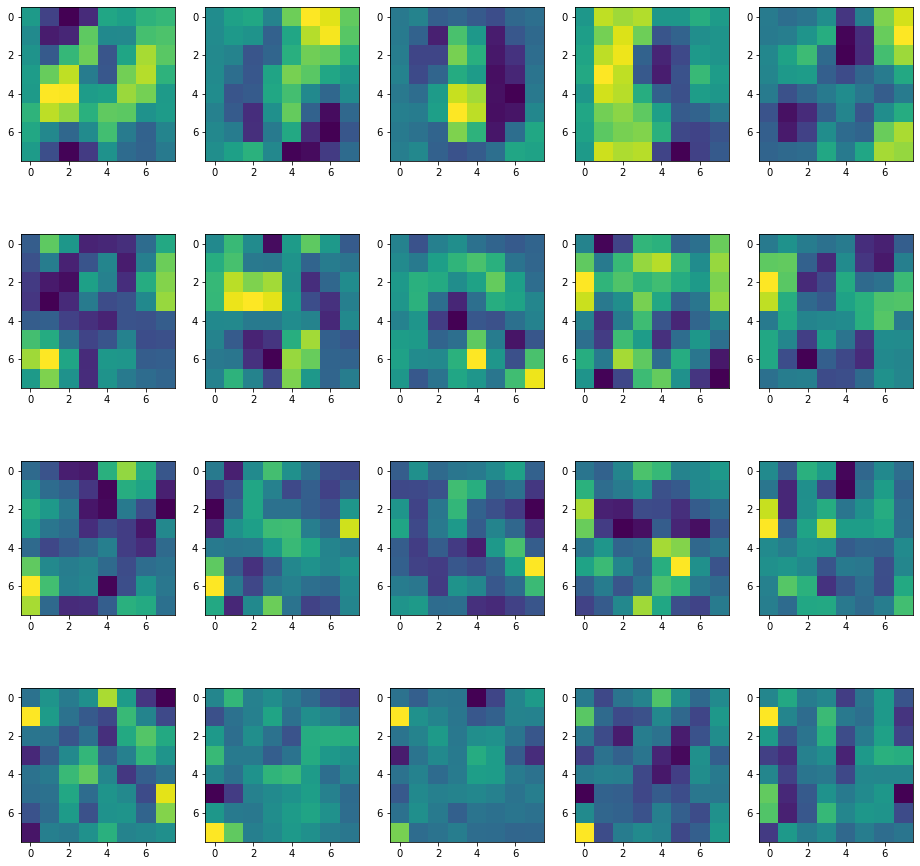

In [0]:
imgSize = digits.images[1,:,:].shape

fig, axs = plt.subplots(4, 5, figsize = [ 16, 16])
for i in np.arange(0,4):
    for j in np.arange(0,5):
        ind = i*5+j
        pImg = np.array(pcaMdl.components_[ind,:]).reshape(imgSize)
        axs[i,j].imshow(pImg)
        
plt.show()

We can see the total variance explained before determining how much the first component accounts for. 

In [0]:
print(np.sum(pcaMdl.explained_variance_ratio_))

0.8930890162708418


In [0]:
print(pcaMdl.explained_variance_ratio_)

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932002 0.02781803 0.02577055
 0.02275302 0.02227177 0.02165228 0.0191416  0.01775536 0.01638058
 0.01596457 0.01489097 0.01347877 0.01271523 0.01165828 0.01053717
 0.00974597 0.00944097 0.00862691 0.00833627 0.00795502 0.00745814]


In [0]:
pcaMdl.explained_variance_ratio_.max()

0.12033916097734207

In [0]:
pcaMdl.explained_variance_ratio_.min()

0.007458137718865244

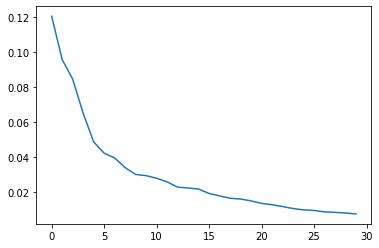

In [0]:
plt.plot(pcaMdl.explained_variance_ratio_)

In [0]:
np.sort(pcaMdl.explained_variance_ratio_)

array([0.00745814, 0.00795502, 0.00833627, 0.00862691, 0.00944097,
       0.00974597, 0.01053717, 0.01165828, 0.01271523, 0.01347877,
       0.01489097, 0.01596457, 0.01638058, 0.01775536, 0.0191416 ,
       0.02165228, 0.02227177, 0.02275302, 0.02577055, 0.02781803,
       0.02932002, 0.02998221, 0.03389381, 0.03942083, 0.0421412 ,
       0.04860155, 0.06498408, 0.08444415, 0.09561054, 0.12033916])

We can sort the components by variance explained, which may not be necessary, to take the top five. 

In [0]:
top = np.sort(pcaMdl.explained_variance_ratio_)
top = top[-5:, ]
top.sum()

0.41397948173160815

In [0]:
top

array([0.04860155, 0.06498408, 0.08444415, 0.09561054, 0.12033916])

In [0]:
We can also plot the eigenvalues by image or for all images. 

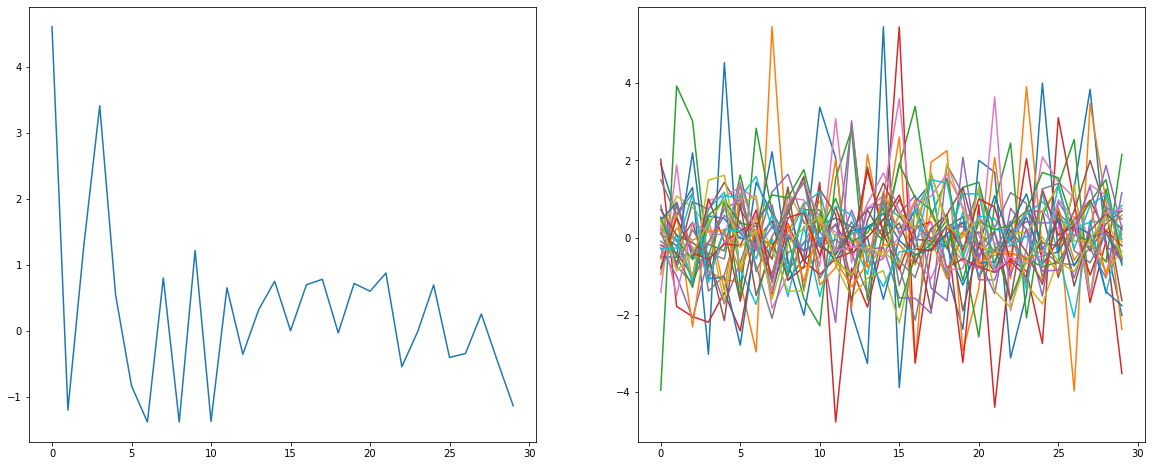

array([ 4.60594921e+00, -1.20138045e+00,  1.28790056e+00,  3.40860126e+00,
        5.38883685e-01, -8.34610341e-01, -1.38283056e+00,  8.00700712e-01,
       -1.38245942e+00,  1.21592018e+00, -1.37290309e+00,  6.50136783e-01,
       -3.55810017e-01,  3.20110891e-01,  7.49353999e-01,  1.10511623e-03,
        6.97021947e-01,  7.79230918e-01, -3.28965568e-02,  7.16347954e-01,
        5.98968000e-01,  8.73781567e-01, -5.45009794e-01, -1.04876510e-02,
        6.94870369e-01, -4.04702197e-01, -3.43783136e-01,  2.53484852e-01,
       -4.52558722e-01, -1.13585063e+00])

In [0]:
IMG_NO = 377

fig, axs = plt.subplots(1, 2, figsize = [20, 8])

axs[0].plot(pcaCoor[IMG_NO, 0:NUM_COMP])
axs[1].plot(pcaCoor[0:NUM_COMP])

plt.show()

pcaCoor[IMG_NO, 0:30]

In [0]:
IMG_NO = 52
idx = [1, 3, 5, 7, 9, 11, 13, 15]
len(idx)

8

After selecting an image, we can show reconstructions as we add components.

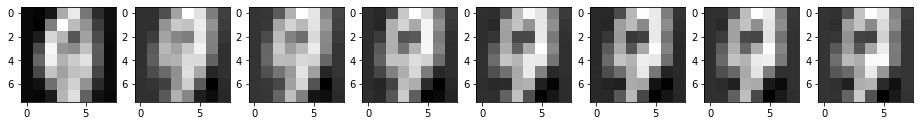

In [0]:
fig, axs = plt.subplots(1, 8, figsize = [16, 16])
for i in np.arange(0, 8):
    ind = idx[i]
    imgRecon = np.dot(pcaCoor[IMG_NO,0:ind], pcaMdl.components_[0:ind,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    f1 = imgRecon.reshape(imgSize)
    axs[i].imshow(f1, cmap = 'gray')

plt.show()

We can then check the reconstruction errors by image.

In [0]:
from numpy import linalg as LA

IMG_NO = 105

In [0]:
imgActual = mat[IMG_NO, :]

for i in np.arange(0, 5):
        ind = i
        
        imgRecon = np.dot(pcaCoor[IMG_NO, 0:ind], pcaMdl.components_[0:ind,:])
        imgRecon = scaler.inverse_transform(imgRecon)
        
        imgDiff = np.abs(imgActual - imgRecon)

        print('Num PCA comp: ' + str(ind) + ', reconstruction error: ' + str(LA.norm(imgDiff.flatten())))

Num PCA comp: 0, reconstruction error: 34.221167701324404
Num PCA comp: 1, reconstruction error: 32.95427282545323
Num PCA comp: 2, reconstruction error: 32.310478822503555
Num PCA comp: 3, reconstruction error: 29.09245447546672
Num PCA comp: 4, reconstruction error: 25.36849605795068


In [0]:
zero = np.zeros(digits.target.shape[0])

for i in np.arange(0, len(mat)):
    imgActual = mat[i, :]
    imgRecon = np.dot(pcaCoor[IMG_NO, 0:5], pcaMdl.components_[0:5,:])
    imgRecon = scaler.inverse_transform(imgRecon)
        
    imgDiff = np.abs(imgActual - imgRecon)

    error = LA.norm(imgDiff.flatten())
        
    zero[i] = error

In [0]:
zero.min()
zero.max()

60.43885851777604

In [0]:
high = zero[0]
indx = 0

for i in np.arange(0, len(zero)):
    if zero[i] > high:
        high = zero[i]
        indx = i

print(high)
print(indx)

60.43885851777604
163


In [0]:
high = zero[0]
indx = 0

for i in np.arange(1, len(zero)):
    if zero[i] < high:
        high = zero[i]
        indx = i

print(high)
print(indx)

19.031188718299607
1696


We plot reconstruction errors to see the variance across digits. 

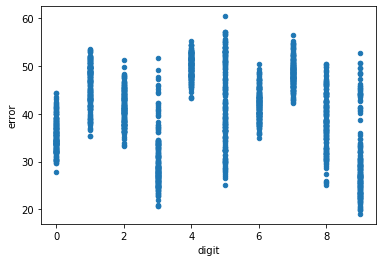

In [0]:
df = pd.DataFrame({'digit': digits.target, 'error': zero})
df.plot('digit', 'error', kind = 'scatter')

Text(0, 0.5, 'errors')

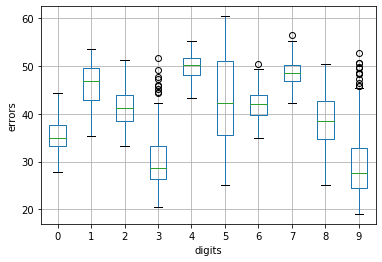

In [0]:
df.pivot(columns = 'digit', values = 'error').boxplot()
plt.xlabel('digits')
plt.ylabel('errors')

Then we can create a table to see the exact values for each digit. 

In [0]:
df.groupby(['digit']).mean()

,error
digit,
0,35.488197
1,45.972983
2,41.370817
3,30.324162
4,49.961764
5,42.664405
6,42.031562
7,48.606407
8,38.583612


## partitioning ex post

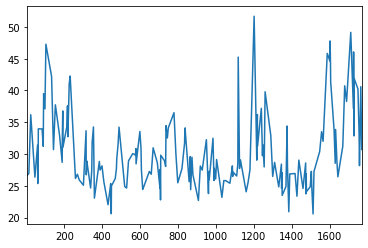

In [0]:
df[df['digit'] == 3]['error'].plot()

Note that because Pandas preserves the index of the values kept after filtering the data, the scale is a little wonky. 

In [0]:
pcaCoorNew = pcaCoor[digits.target == 3]

idx = [1, 3, 5, 7, 9, 11, 13, 15] 
IMG_NO = 0

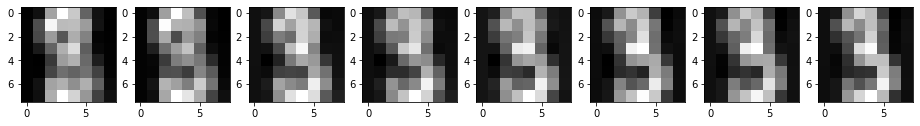

In [0]:
fig, axs = plt.subplots(1, 8, figsize = [16, 16])

for i in np.arange(0, 8):
    ind = idx[i]
    imgRecon = np.dot(pcaCoorNew[IMG_NO,0:ind], pcaMdl.components_[0:ind,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    f1 = imgRecon.reshape(imgSize)
    axs[i].imshow(f1, cmap = 'gray')

plt.show()

## partioning ex ante

In [0]:
mat.shape

(1797, 64)

In [0]:
mat[digits.target == 3].shape

(183, 64)

In [0]:
remat = mat[digits.target == 3]

In [0]:
scaler = StandardScaler()
scaler.fit(remat)
Y = scaler.transform(remat)

In [0]:
pca = PCA(n_components = NUM_COMP)
pcaMdl = pca.fit(Y)
pcaCoor = pcaMdl.transform(Y)
dfPCA = pd.DataFrame(data = pcaCoor, columns = ['PCA_' + s for s in np.arange(0, NUM_COMP).astype(str)])

In [0]:
dfPCA

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29
0,-1.740726,-2.469185,1.941222,-0.357411,1.066130,-0.129944,-0.260419,1.212576,0.449708,-0.719058,...,-0.158802,-0.254360,0.228936,-0.525420,0.561225,-0.341625,1.007227,-0.128115,-0.154301,-0.748013
1,2.312144,0.205816,-0.780567,-0.775975,-0.528147,-0.927189,0.351516,0.124875,0.770195,0.648098,...,-1.437696,-0.635473,-0.488372,0.535529,-0.403618,-0.318920,0.701925,-0.051142,-0.795130,-0.643161
2,4.319231,3.453724,-2.392294,1.533746,-1.177427,-0.250237,0.205811,0.910690,2.132098,-0.538018,...,0.041483,-1.305001,0.759519,0.239149,0.559150,-0.414539,-0.148040,-0.951150,-0.591443,-0.114159
3,-0.532569,-1.411310,-0.736529,-0.055407,0.201521,-0.634229,0.586233,0.556443,-0.942548,-0.434155,...,-0.221747,-0.719127,-0.265167,0.268797,-0.488780,-0.605394,0.196503,0.659711,-0.251365,-0.801841
4,2.211523,-1.084929,0.609120,-0.676369,0.196899,-1.728275,-0.732368,-1.224351,-0.144365,0.086662,...,0.951241,-0.049908,0.833152,0.515316,-0.300794,0.575836,0.196817,-0.042942,-0.249288,-0.203095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,4.919582,1.108584,1.640790,0.718846,-0.839691,1.603486,-1.263946,-0.510916,0.190920,1.450202,...,-1.426849,-1.618035,-0.251925,1.226045,-0.340818,0.523916,-1.055519,0.771067,0.391777,-0.827310
179,2.883406,1.486861,0.269421,-1.074326,0.963583,-0.680709,-2.196855,-0.720091,0.402318,1.075448,...,-1.588580,-0.833305,0.072783,0.638734,-0.185357,-0.354105,-0.209821,0.761286,0.122644,-0.438406
180,-1.078142,-1.214680,2.699817,0.623343,-0.207592,1.952562,-0.434988,-0.643397,1.281877,-0.085358,...,-1.227462,-0.550368,-0.438990,0.420206,0.352459,-1.216713,1.849614,-1.404391,1.350659,0.300301
181,1.728553,-1.478205,7.051172,1.026366,-0.815711,3.268010,0.659133,-1.326078,2.769113,-1.589605,...,0.317559,1.029332,0.650043,-0.147312,-0.467693,0.201857,-0.126607,0.084132,0.444768,-0.516448


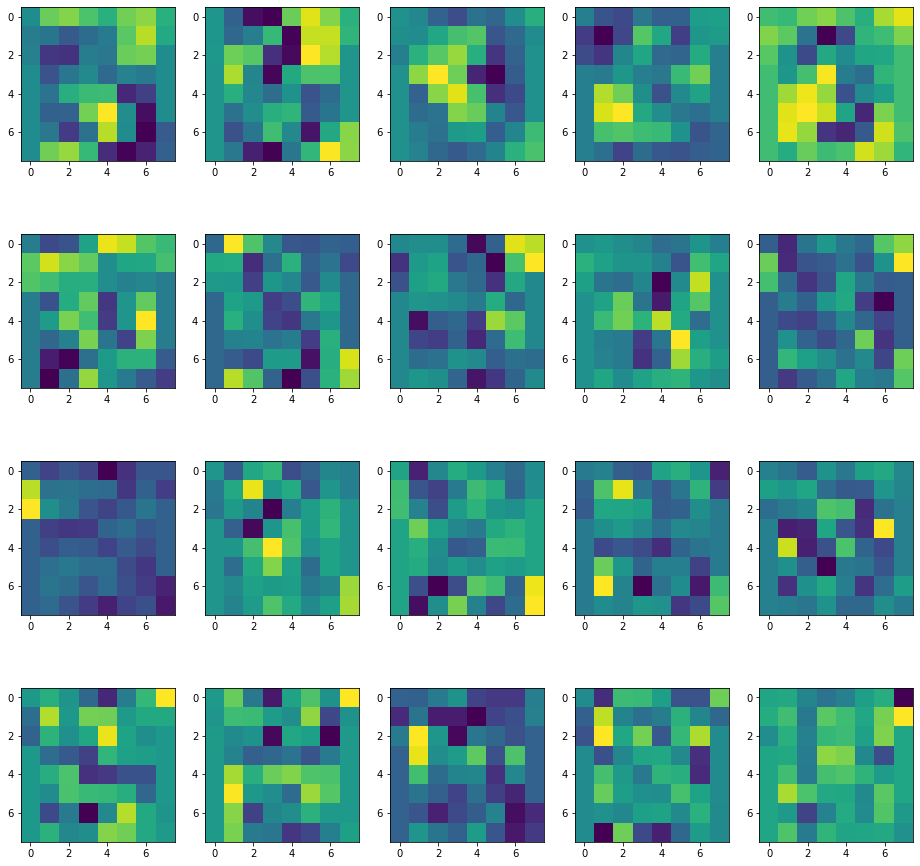

In [0]:
fig, axs = plt.subplots(4, 5, figsize = [16, 16])

for i in np.arange(0,4):
    for j in np.arange(0,5):
        ind = i*5+j
        pImg = np.array(pcaMdl.components_[ind,:]).reshape(imgSize)
        axs[i,j].imshow(pImg)
        
plt.show()

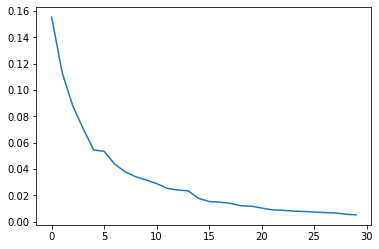

In [0]:
plt.plot(pcaMdl.explained_variance_ratio_)

array([-1.74072638, -2.46918515,  1.94122181, -0.3574108 ,  1.06613021,
       -0.12994441, -0.26041904,  1.21257591,  0.44970835, -0.71905772])

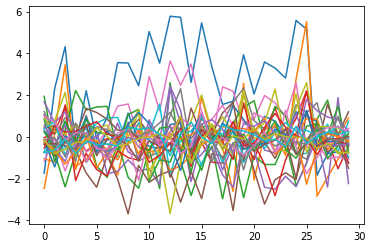

In [0]:
plt.plot(pcaCoor[0:NUM_COMP])
pcaCoor[IMG_NO, 0:10]

Here we plot the errors for this limited dataset. 

In [0]:
zero = np.zeros(remat.shape[0])

for i in np.arange(0, len(remat)):
    imgActual = remat[i, :]
    imgRecon = np.dot(pcaCoor[IMG_NO, 0:5], pcaMdl.components_[0:5,:])
    imgRecon = scaler.inverse_transform(imgRecon)
        
    imgDiff = np.abs(imgActual - imgRecon)

    error = LA.norm(imgDiff.flatten())
        
    zero[i] = error

error = zero

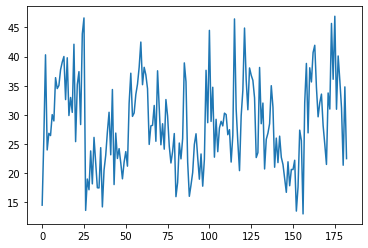

In [0]:
plt.plot(error)

We can check that the mean error is less here then for digit three in the above table. 

In [0]:
error.mean()

28.505717167199553

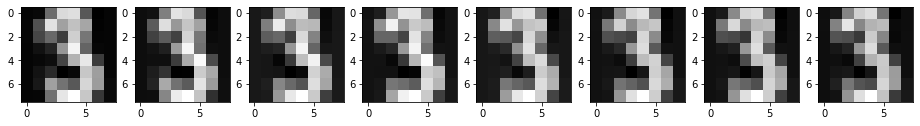

In [0]:
fig, axs = plt.subplots(1, 8, figsize = [16, 16])

for i in np.arange(0, 8):
    ind = idx[i]
    imgRecon = np.dot(pcaCoorNew[IMG_NO,0:ind], pcaMdl.components_[0:ind,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    f1 = imgRecon.reshape(imgSize)
    axs[i].imshow(f1, cmap = 'gray')

plt.show()

# SVM

In [0]:
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

We will using the same images for this section. 

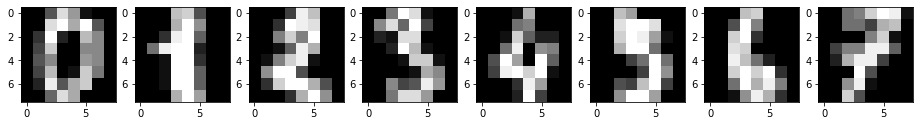

In [0]:
fig, axs = plt.subplots(1, 8, figsize = [16, 16])

for i in np.arange(0, 8):
    imgTmp = digits.images[i,:,:].squeeze()
    axs[i].imshow(imgTmp, cmap = 'gray')

plt.show()

We want to partion the data so that we train on 60% of the data, but we need to round to the nearest integer.

In [0]:
numTest = round(digits.target.shape[0] * 0.4)

XTr = digits.data[:-numTest,:]
yTr = digits.target[:-numTest]

XTe = digits.data[-numTest:,:]
yTe = digits.target[-numTest:]

print(XTr.shape)
print(XTe.shape)

print(yTr.shape)
print(yTe.shape)

(1078, 64)
(719, 64)
(1078,)
(719,)


In [0]:
clf = svm.SVC(gamma = 0.001, C = 100.)
clf.fit(XTr, yTr)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
[testDigit, testCounts] = np.unique(yTe, return_counts = True)

print(testDigit)
print(testCounts)

[0 1 2 3 4 5 6 7 8 9]
[71 73 71 74 74 71 74 72 68 71]


In [0]:
pred = clf.predict(XTe)

We can explore the errors more thoroughly by lining up true values and guessed values. 

In [0]:
scorecard = pd.DataFrame({'true': yTe, 'guess': pred})
scorecard['score'] = (scorecard['true'] == scorecard['guess'])

scorecard[scorecard['score'] == False].head()

,true,guess,score
40,3,7,False
100,1,8,False
164,1,2,False
186,1,8,False
283,5,6,False


In [0]:
acc = np.sum(pred == yTe) / pred.shape[0]
print(acc)

0.9680111265646731


The accuracy is high but we can also sum the successes to see if it is equally accurate across digits. 

In [0]:
scorecard[['true', 'score']].groupby('true').sum()

,score
true,
0,70.0
1,70.0
2,69.0
3,64.0
4,71.0
5,70.0
6,73.0
7,72.0
8,68.0


To finish, we run a loop that runs PCA and then runs SVM on the resulting "shrunk" data. 

In [0]:
tests = [2, 5, 10, 20]

empty = np.zeros(tests) 

for i in tests:
    NUM_COMP = i
    pca = PCA(n_components = NUM_COMP)
    pcaMdl = pca.fit(X)
    pcaCoor = pcaMdl.transform(X)
    
    XTr = pcaCoor[:-numTest,:]
    yTr = digits.target[:-numTest]

    XTe = pcaCoor[-numTest:,:]
    yTe = digits.target[-numTest:]

    clf = svm.SVC(gamma=0.001, C=100.)
    clf.fit(XTr, yTr)

    pred = clf.predict(XTe)

    acc = np.sum(pred == yTe) / pred.shape[0]
    
    print('Num PCA comp: ' + str(NUM_COMP) + ', accuracy: ' + str(acc))

Num PCA comp: 2, accuracy: 0.5062586926286509
Num PCA comp: 5, accuracy: 0.8191933240611962
Num PCA comp: 10, accuracy: 0.8817802503477051
Num PCA comp: 20, accuracy: 0.9304589707927677


We can also save this data and plot the rate at which accuracy rises with components.

In [0]:
empty = np.zeros((20, 2))

for i in np.arange(0, 20):
    NUM_COMP = i + 1
    
    pca = PCA(n_components = NUM_COMP)
    pcaMdl = pca.fit(X)
    pcaCoor = pcaMdl.transform(X)
    
    XTr = pcaCoor[:-numTest,:]
    yTr = digits.target[:-numTest]

    XTe = pcaCoor[-numTest:,:]
    yTe = digits.target[-numTest:]

    clf = svm.SVC(gamma=0.001, C=100.)
    clf.fit(XTr, yTr)

    pred = clf.predict(XTe)

    acc = np.sum(pred == yTe) / pred.shape[0]
    
    empty[i] = [i + 1, acc]
    

It appears that a few components do most of the heavy lifting. 

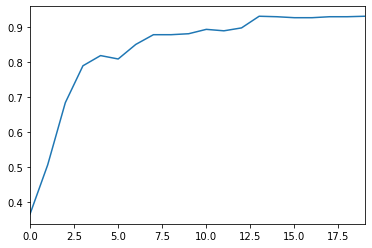

In [0]:
final = pd.DataFrame(empty, columns = ['num_comp', 'accuracy'])
final['accuracy'].plot()